In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['animation.ffmpeg_path']='/mnt/d/ffmpeg/bin/ffmpeg.exe'

## Model of HH disease

$$ \frac{\partial H}{\partial t} = -c\frac{\partial H}{\partial y}+\lambda H(H-a)(1-H)+D \Delta H $$

In [2]:
T=1000
dt=0.1
dx=0.1

a=0.5
c=0.1
lam=2
D=0.5


In [3]:
def update_H(H):
    
    advection=c*(H[1:100,1:99]-H[0:99,1:99])/dx
    growth=lam*H[0:99,1:99]*(H[0:99,1:99]-a)*(1-H[0:99,1:99])
    dispersal=D*(H[0:99,0:98]-2*H[0:99,1:99]+H[0:99,2:100])/(dx*2) # currently only in x direction
    
    dHdt=advection +growth +dispersal
    
    dH=dHdt*dt
    
    H[0:99,1:99]=H[0:99,1:99]+dH
    
    return H
    

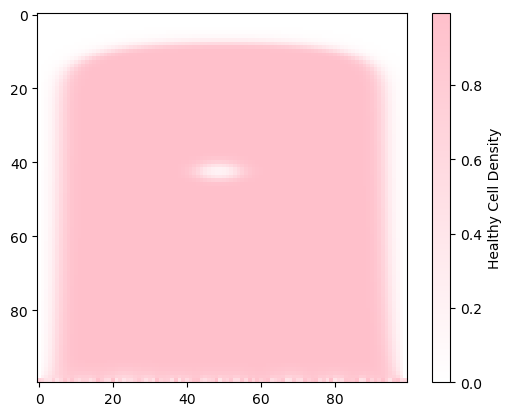

In [4]:
H=np.zeros([100,100])

#initial condition
H[99,:]=np.random.uniform(0,1,100)*0.6+0.4

fig=plt.figure()
custom_cmap=LinearSegmentedColormap.from_list('custom',['white','pink'])
l =plt.imshow(H,cmap=custom_cmap)
cbar=plt.colorbar(label='Healthy Cell Density')



metadata = dict(title='Movie', artist='Jack')
writer = FFMpegWriter(fps=50,metadata=metadata)


with writer.saving(fig,'test.gif',100):
    for i in range(1,T):
        
        H=update_H(H)
        
        if i==350:
            H[99,20:80]=np.random.uniform(0,1,60)*0.4
            
        if i==420:
            H[99,20:80]=np.random.uniform(0,1,60)*0.6+0.4
        
        l.set_data(H)
        writer.grab_frame()